In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [3]:
model = joblib.load('../models/best_model.pkl')
df = pd.read_csv('../data/daily_sales.csv')
df['date'] = pd.to_datetime(df['date'])
print("Model and data loaded")

Model and data loaded


In [4]:
feature_cols = ['year', 'month', 'day', 'dayofweek', 'is_weekend', 
                'sales_yesterday', 'sales_last_week']

In [5]:
df_clean = df.dropna()
split_date = df_clean['date'].max() - pd.DateOffset(days=30)
test_data = df_clean[df_clean['date'] >= split_date]

In [6]:
X_test = test_data[feature_cols]
y_test = test_data['total_sales']
y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0)

In [7]:
# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: ${mae:,.0f}")
print(f"RMSE: ${rmse:,.0f}")
print(f"R²: {r2:.3f}")

MAE: $53,329
RMSE: $68,533
R²: 0.721


(array([17364., 17368., 17372., 17376., 17379., 17383., 17387., 17391.]),
 [Text(17364.0, 0, '2017-07-17'),
  Text(17368.0, 0, '2017-07-21'),
  Text(17372.0, 0, '2017-07-25'),
  Text(17376.0, 0, '2017-07-29'),
  Text(17379.0, 0, '2017-08-01'),
  Text(17383.0, 0, '2017-08-05'),
  Text(17387.0, 0, '2017-08-09'),
  Text(17391.0, 0, '2017-08-13')])

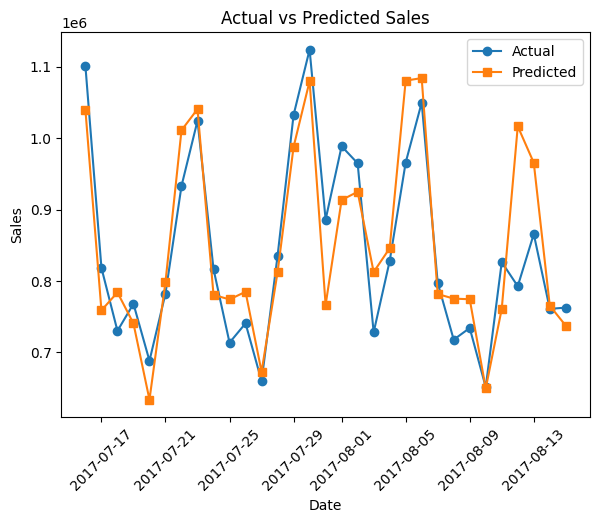

In [9]:
# Visualizations
plt.figure(figsize=(15, 5))

# Time series comparison
plt.subplot(1, 2, 1)
plt.plot(test_data['date'], y_test, label='Actual', marker='o')
plt.plot(test_data['date'], y_pred, label='Predicted', marker='s')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)

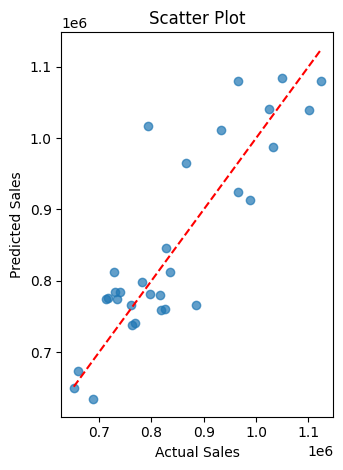

In [12]:
# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

Feature Importance:
           feature  importance
6  sales_last_week    0.686053
5  sales_yesterday    0.153073
2              day    0.061412
3        dayofweek    0.041602
4       is_weekend    0.022055
1            month    0.020818
0             year    0.014988


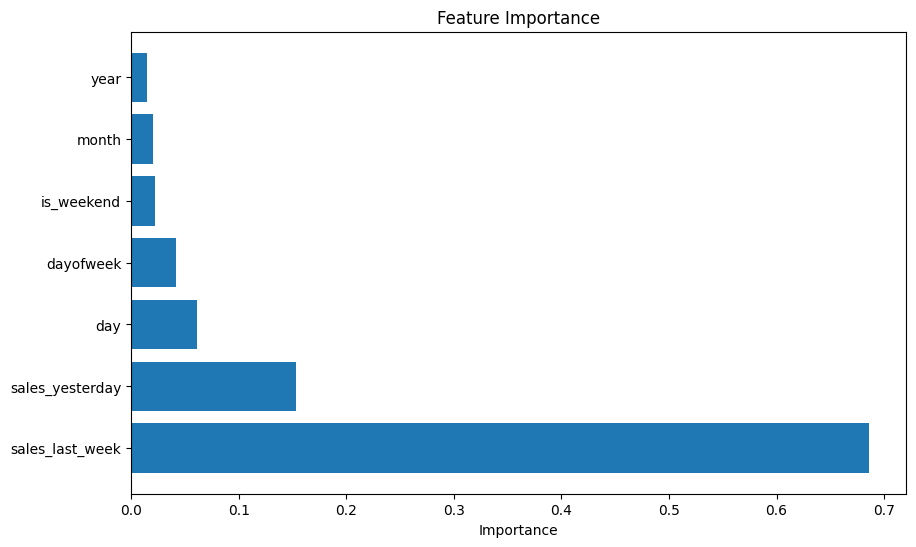

In [11]:
# Feature importance (if Random Forest)
try:
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    print("Feature Importance:")
    print(feature_importance)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.show()
except:
    print("Feature importance not available for this model")